In [2]:
# pip install pandas numpy matplotlib gudhi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

## 持久性做圖計算

In [2]:
# PD compute
def compute_persistence(image):
    cub_complex = gd.CubicalComplex(dimensions=image.shape, top_dimensional_cells=image.flatten())
    cub_complex.persistence()
    dim_0 = cub_complex.persistence_intervals_in_dimension(0)
    dim_1 = cub_complex.persistence_intervals_in_dimension(1)
    return dim_0, dim_1

# PD plot
def plot_persistence_diagram(pd, title):
    plt.figure(figsize=(6, 6))
    max_birth_death = 0
    colors = ['blue', 'orange']
    labels = ['Connected Component', 'Hole']
    for dim, intervals in enumerate(pd):
        if len(intervals) > 0:
            intervals = np.array(intervals)
            plt.scatter(intervals[:, 0], intervals[:, 1], label=f'Dimension {dim} ({labels[dim]})', color=colors[dim])
            finite_intervals = intervals[np.isfinite(intervals[:, 1])]
            if finite_intervals.size > 0:
                max_birth_death = max(max_birth_death, finite_intervals.max())

    # 對角線
    plt.plot([0, max_birth_death], [0, max_birth_death], 'k--', label='Diagonal')

    plt.title(title)
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.legend()
    plt.show()

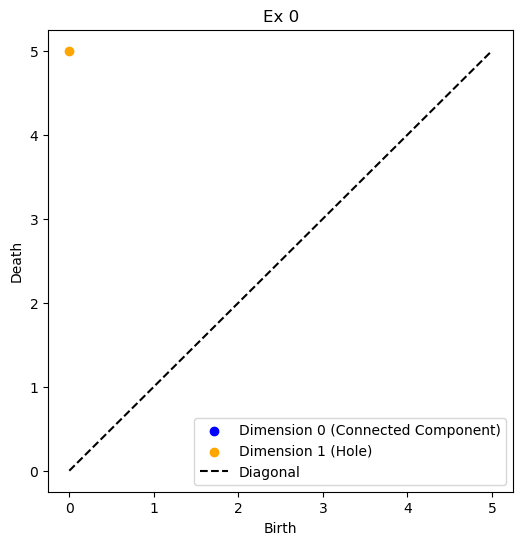

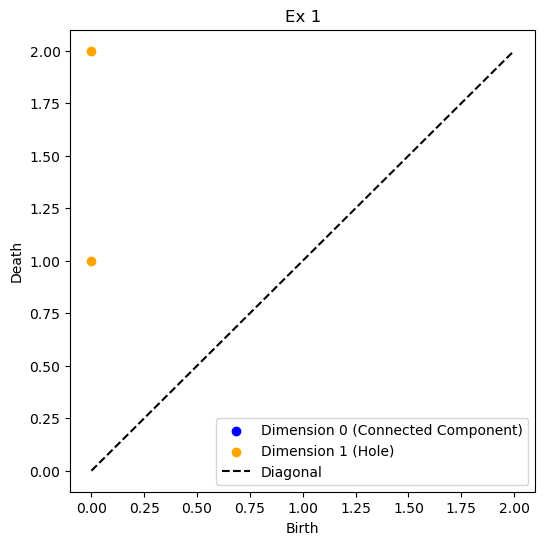

In [3]:
image_0 = np.array([
    [5, 5, 0, 5],
    [5, 0, 5, 0],
    [5, 5, 0, 5],
    [5, 5, 5, 5]
])

image_8 = np.array([
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [1, 0, 2, 0],
    [0, 1, 0, 0]
])

pd_image_0 = compute_persistence(image_0)
pd_image_8 = compute_persistence(image_8)

plot_persistence_diagram(pd_image_0, 'Ex 0')
plot_persistence_diagram(pd_image_8, 'Ex 1')

In [4]:
data = pd.read_csv('image.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 圖像反白
用意為黑色rgb為0，而圖像持久性是從0開始增加，所以在反白後可以觀察到**hole**

In [5]:
image_0 = data[data['label'] == 0].iloc[0, 1:].values.reshape(28, 28)
image_8 = data[data['label'] == 8].iloc[0, 1:].values.reshape(28, 28)
image_9 = data[data['label'] == 9].iloc[0, 1:].values.reshape(28, 28)

def invert_image(image):
    return 255 - image

image_0 = invert_image(image_0)
image_8 = invert_image(image_8)
image_9 = invert_image(image_9)

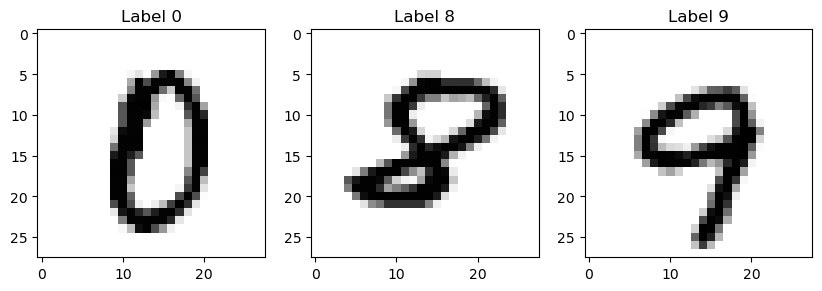

In [6]:
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_0, cmap='gray')
plt.title('Label 0')

plt.subplot(1, 3, 2)
plt.imshow(image_8, cmap='gray')
plt.title('Label 8')

plt.subplot(1, 3, 3)
plt.imshow(image_9, cmap='gray')
plt.title('Label 9')

plt.show()

# 計算Cubical Complex PD

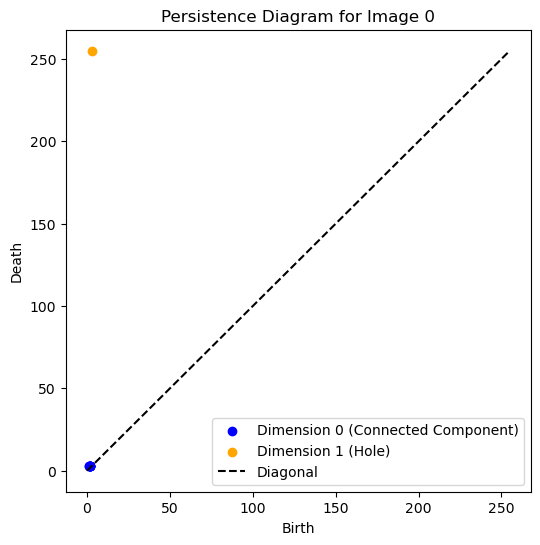

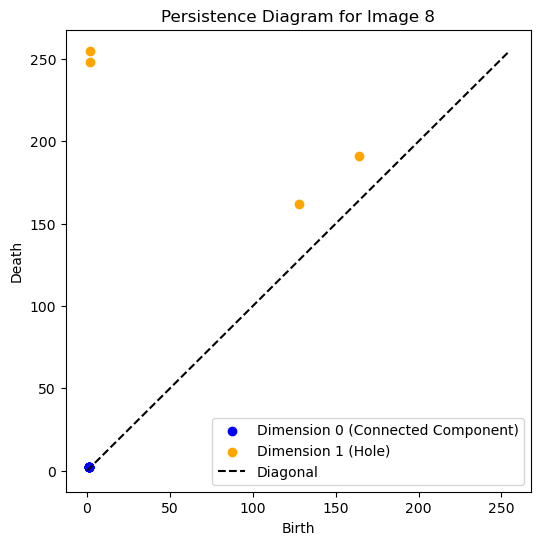

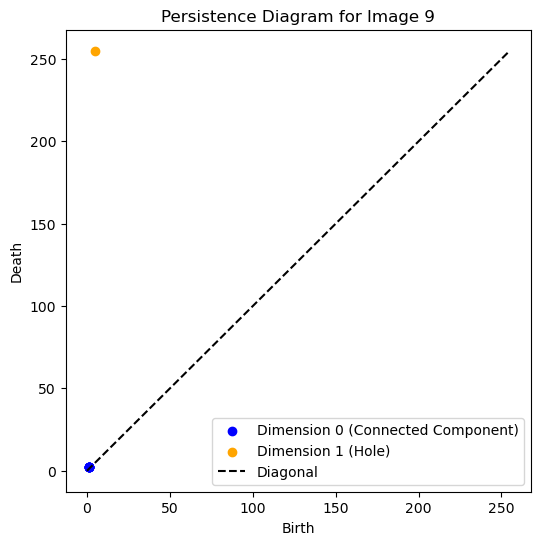

In [7]:
pd_image_0 = compute_persistence(image_0)
pd_image_8 = compute_persistence(image_8)
pd_image_9 = compute_persistence(image_9)

plot_persistence_diagram(pd_image_0, 'Persistence Diagram for Image 0')
plot_persistence_diagram(pd_image_8, 'Persistence Diagram for Image 8')
plot_persistence_diagram(pd_image_9, 'Persistence Diagram for Image 9')

# 計算Rips Complex PD

In [12]:
# pip install ripser persim

In [8]:
from ripser import Rips
from persim import plot_diagrams
from persim.landscapes import plot_landscape_simple, plot_landscape, PersLandscapeExact

rips = Rips(maxdim = 2)
dgms_0 = rips.fit_transform(image_0)
dgms_8 = rips.fit_transform(image_8)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


C:\Users\USER\anaconda3\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


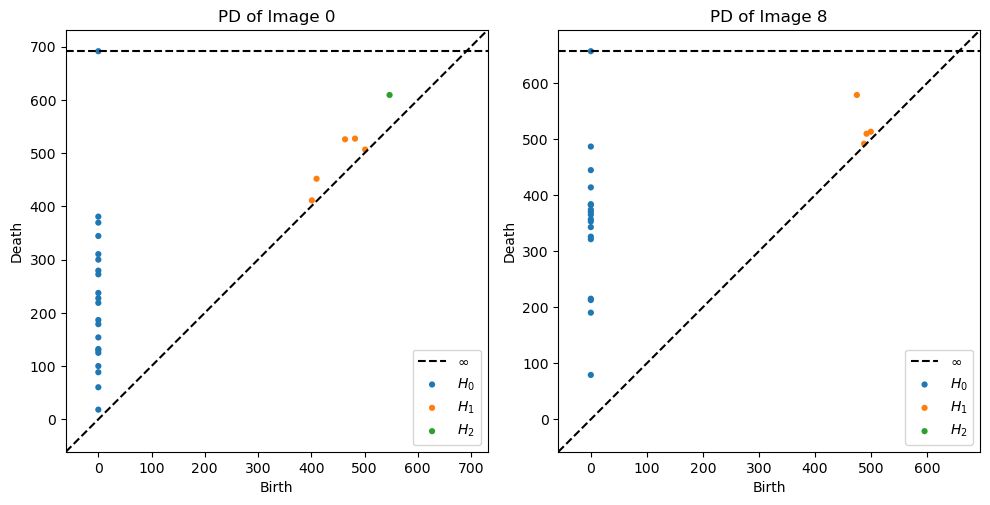

In [9]:
plt.rcParams['text.usetex'] = False

fig, axs = plt.subplots(1, 2, dpi=100)
fig.set_size_inches(10, 5)

plot_diagrams(dgms_0, title="PD of Image 0", ax=axs[0])

plot_diagrams(dgms_8, title="PD of Image 8", ax=axs[1])

fig.tight_layout()

## Persistent Landscape

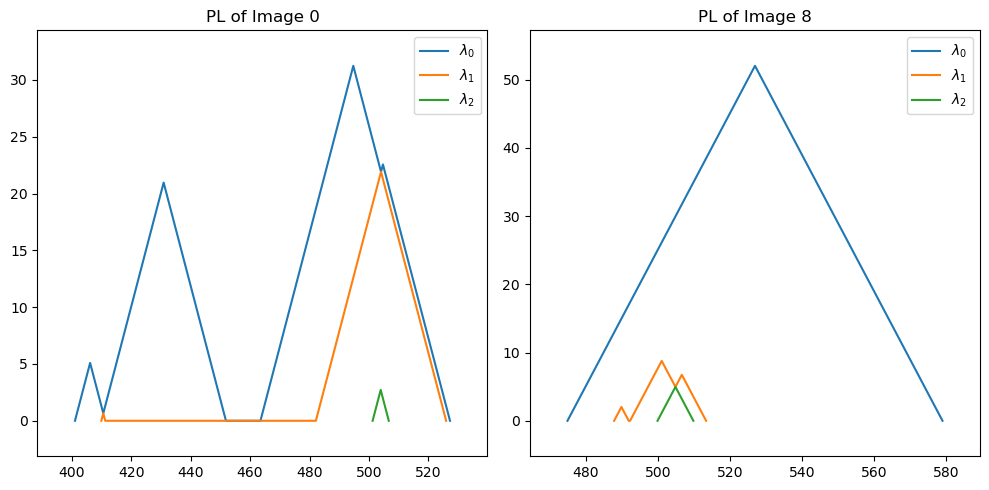

In [10]:
fig, axs = plt.subplots(1, 2, dpi=100)
fig.set_size_inches(10, 5)

plot_landscape_simple(PersLandscapeExact(dgms_0, hom_deg=1),
                             title="PL of Image 0", ax=axs[0])

plot_landscape_simple(PersLandscapeExact(dgms_8, hom_deg=1),
                            title="PL of Image 8", ax=axs[1])

fig.tight_layout()

Figure(640x480)


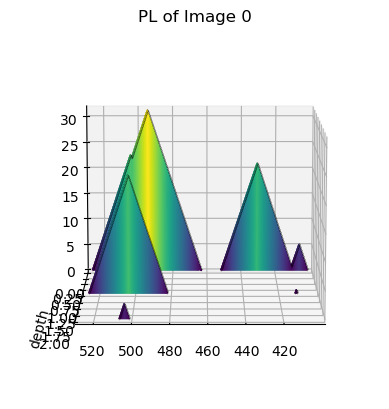

In [11]:
print(plot_landscape(PersLandscapeExact(dgms_0, hom_deg=1), title="PL of Image 0"))

Figure(640x480)


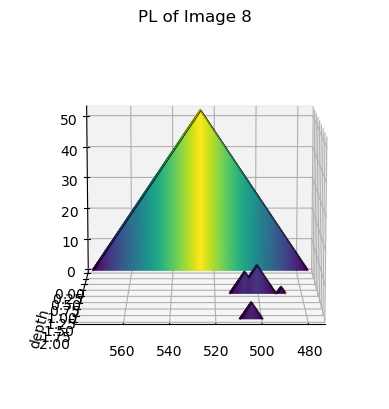

In [12]:
print(plot_landscape(PersLandscapeExact(dgms_8, hom_deg=1), title="PL of Image 8"))